In [42]:
import sys
sys.path.append('../src/')

from benchmark.tools import *
from benchmark.utils import tf_to_image_faces

import choke_point_dataset
import wider_dataset


In [54]:
test = tfds.load('moving_mnist', split=['test'])

In [60]:
for i in test:
    for sample in i.take(5):

        image_faces = tf_to_image_faces(sample)

        for face in image_faces.faces:
            b = face.box
            cv2.rectangle(image_faces.img, (b.x1, b.y1), (b.x2, b.y2), (0, 255, 0), 2)

        plt.imshow(image_faces.img)
        plt.show()

KeyError: 'image'

{'faces': {'bbox': <tf.Tensor: shape=(130, 4), dtype=float32, numpy=
array([[0.55409837, 0.04589844, 0.6032787 , 0.06933594],
       [0.5409836 , 0.14257812, 0.59016395, 0.16503906],
       [0.4704918 , 0.0859375 , 0.52131146, 0.10839844],
       [0.4737705 , 0.18261719, 0.5147541 , 0.20507812],
       [0.4409836 , 0.12597656, 0.48032787, 0.14550781],
       [0.40655738, 0.10058594, 0.4409836 , 0.11816406],
       [0.39836067, 0.21191406, 0.447541  , 0.23144531],
       [0.49508196, 0.21582031, 0.5491803 , 0.23535156],
       [0.5081967 , 0.24902344, 0.5688525 , 0.27246094],
       [0.3442623 , 0.17089844, 0.3885246 , 0.18945312],
       [0.3409836 , 0.1171875 , 0.37704918, 0.13378906],
       [0.38032788, 0.24414062, 0.42295083, 0.26367188],
       [0.3967213 , 0.28710938, 0.4442623 , 0.30859375],
       [0.3409836 , 0.30664062, 0.38196722, 0.32421875],
       [0.31967214, 0.23242188, 0.3590164 , 0.24902344],
       [0.3180328 , 0.1953125 , 0.34754097, 0.21386719],
       [0.21311475,

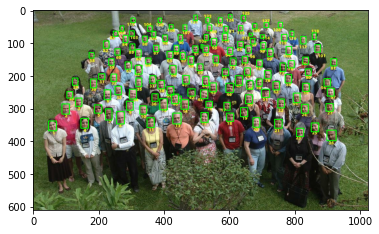

{'faces': {'bbox': <tf.Tensor: shape=(47, 4), dtype=float32, numpy=
array([[3.3920705e-01, 1.6894531e-01, 3.6563876e-01, 1.8847656e-01],
       [3.7591776e-01, 1.2597656e-01, 4.1116005e-01, 1.4941406e-01],
       [3.4801763e-01, 1.1816406e-01, 3.8179147e-01, 1.3378906e-01],
       [3.1571218e-01, 7.6171875e-02, 3.4508076e-01, 9.4726562e-02],
       [3.9794421e-01, 8.6914062e-02, 4.3612334e-01, 1.0839844e-01],
       [4.1409692e-01, 6.0546875e-02, 4.6108663e-01, 8.6914062e-02],
       [3.4361234e-01, 5.0781250e-02, 3.8179147e-01, 6.9335938e-02],
       [3.0249631e-01, 2.6367188e-02, 3.3333334e-01, 4.7851562e-02],
       [3.6857563e-01, 1.6601562e-02, 4.0675476e-01, 3.8085938e-02],
       [3.7004405e-01, 9.7656250e-04, 4.0969163e-01, 1.8554688e-02],
       [4.9779737e-01, 2.1972656e-01, 5.7562411e-01, 2.6269531e-01],
       [3.1718060e-01, 3.1738281e-01, 3.5535976e-01, 3.3496094e-01],
       [3.1277534e-01, 3.1347656e-01, 3.3333334e-01, 3.2812500e-01],
       [3.4214389e-01, 3.5351562e-0

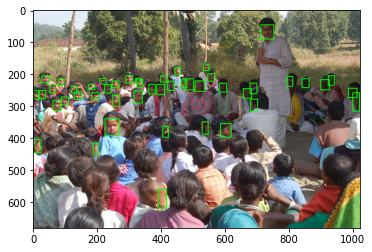

{'faces': {'bbox': <tf.Tensor: shape=(9, 4), dtype=float32, numpy=
array([[0.7753304 , 0.11523438, 0.928047  , 0.1875    ],
       [0.52863437, 0.21679688, 0.66079295, 0.28710938],
       [0.82819384, 0.45898438, 0.96328926, 0.5253906 ],
       [0.56975037, 0.62109375, 0.7195301 , 0.6933594 ],
       [0.51688695, 0.75390625, 0.6431718 , 0.8203125 ],
       [0.51688695, 0.9082031 , 0.64023495, 0.97265625],
       [0.67547727, 0.34570312, 0.79882526, 0.40625   ],
       [0.5227606 , 0.42773438, 0.6461087 , 0.48632812],
       [0.16446403, 0.07421875, 0.2701909 , 0.12890625]], dtype=float32)>, 'blur': <tf.Tensor: shape=(9,), dtype=uint8, numpy=array([1, 1, 1, 1, 1, 1, 2, 2, 0], dtype=uint8)>, 'expression': <tf.Tensor: shape=(9,), dtype=bool, numpy=array([False, False, False, False, False, False, False, False, False])>, 'illumination': <tf.Tensor: shape=(9,), dtype=bool, numpy=array([False, False, False, False, False, False, False, False, False])>, 'invalid': <tf.Tensor: shape=(9,), dtype=

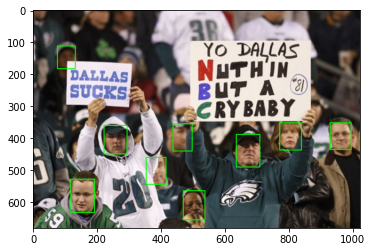

{'faces': {'bbox': <tf.Tensor: shape=(29, 4), dtype=float32, numpy=
array([[0.75770926, 0.14355469, 0.97650516, 0.20117188],
       [0.7209985 , 0.4404297 , 0.8164464 , 0.48535156],
       [0.6387665 , 0.45898438, 0.7180617 , 0.5048828 ],
       [0.36417034, 0.24023438, 0.38619676, 0.25      ],
       [0.36710718, 0.21875   , 0.37885463, 0.22949219],
       [0.35389134, 0.31445312, 0.37298092, 0.3232422 ],
       [0.4185022 , 0.33691406, 0.4581498 , 0.35742188],
       [0.55947137, 0.55859375, 0.5741556 , 0.56640625],
       [0.56975037, 0.5136719 , 0.5829662 , 0.51953125],
       [0.48311308, 0.6464844 , 0.49339208, 0.65234375],
       [0.54919237, 0.85058594, 0.5653451 , 0.859375  ],
       [0.56828195, 0.88964844, 0.5844346 , 0.8955078 ],
       [0.37298092, 0.29785156, 0.39353892, 0.30371094],
       [0.37004405, 0.375     , 0.40088105, 0.38183594],
       [0.4434655 , 0.5292969 , 0.45227605, 0.5341797 ],
       [0.4845815 , 0.52441406, 0.49339208, 0.5292969 ],
       [0.50807637, 

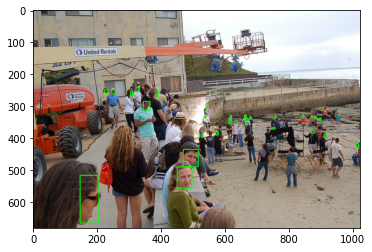

{'faces': {'bbox': <tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0.0387931 , 0.7011719 , 0.18362069, 0.8251953 ],
       [0.11551724, 0.5644531 , 0.2637931 , 0.6748047 ]], dtype=float32)>, 'blur': <tf.Tensor: shape=(2,), dtype=uint8, numpy=array([0, 0], dtype=uint8)>, 'expression': <tf.Tensor: shape=(2,), dtype=bool, numpy=array([False, False])>, 'illumination': <tf.Tensor: shape=(2,), dtype=bool, numpy=array([False, False])>, 'invalid': <tf.Tensor: shape=(2,), dtype=bool, numpy=array([False, False])>, 'occlusion': <tf.Tensor: shape=(2,), dtype=uint8, numpy=array([0, 0], dtype=uint8)>, 'pose': <tf.Tensor: shape=(2,), dtype=bool, numpy=array([False, False])>}, 'image': <tf.Tensor: shape=(1160, 1024, 3), dtype=uint8, numpy=
array([[[211, 211, 201],
        [210, 210, 200],
        [210, 210, 200],
        ...,
        [144, 135, 120],
        [144, 135, 120],
        [143, 134, 119]],

       [[211, 211, 201],
        [210, 210, 200],
        [210, 210, 200],
        ...,
     

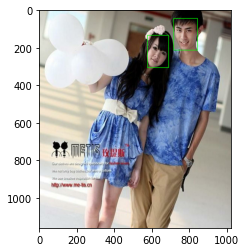

In [47]:
for sample in test:
    print(sample)
    image_faces = tf_to_image_faces(sample)

    for face in image_faces.faces:
        b = face.box
        cv2.rectangle(image_faces.img, (b.x1, b.y1), (b.x2, b.y2), (0, 255, 0), 2)
    
    plt.imshow(image_faces.img)
    plt.show()

In [5]:
def read_choke_annotations(file, img_dict):
    image_dir = "../datasets/choke_point/chokepoint-data"

    pattern_fname = re.compile(r'(.*.jpg)')
    pattern_annot = re.compile(r'.*.jpg,(\d+),(\d+),(\d+),(\d+)$')
    
    while True:
        line = file.readline()
        match = pattern_fname.match(line)

        if match is None:
            break
        fname = match.group(1)
        image_fullpath = os.path.join(image_dir, fname)
        faces = []

        with tf.io.gfile.GFile(image_fullpath, 'rb') as fp:
            image = tfds.core.lazy_imports.PIL_Image.open(fp)
            width, height = image.size

        match = pattern_annot.match(line)

        if not match:
            raise ValueError('Cannot parse: %s' % image_fullpath)

        (ymin, xmin, wbox, hbox) = map(int, match.groups())
        
        img_dict[fname] = (ymin, xmin, wbox, hbox)

In [6]:
import re
import os

g1_path = "../datasets/choke_point/chokepoint-groundtruth/G1/train_annotation.txt"
g2_path = "../datasets/choke_point/chokepoint-groundtruth/G2/train_annotation.txt"

img_dict = {}

with tf.io.gfile.GFile(g1_path, 'r') as f:
    read_choke_annotations(f, img_dict)
    
with tf.io.gfile.GFile(g2_path, 'r') as f:
    read_choke_annotations(f, img_dict)

In [48]:
import glob

num_of_sequences = 1

def load_sequences(n):
    data_path = "../datasets/choke_point/chokepoint-data"
    i = 0
    
    for d in os.listdir(data_path):
        if i >= num_of_sequences:
            break

        sequence_path = os.path.join(data_path, d)

        for image_fullpath in glob.glob("{}/*.jpg".format(sequence_path)):

            faces = []

            with tf.io.gfile.GFile(image_fullpath, 'rb') as fp:
                image = tfds.core.lazy_imports.PIL_Image.open(fp)
                width, height = image.size

            image_key = image_fullpath.replace(data_path, '.').replace('\\', '/')

            if image_key in img_dict:
                bbox_data = img_dict[image_key]

                (ymin, xmin, wbox, hbox) = bbox_data[0], bbox_data[1], bbox_data[2], bbox_data[3]
                ymax = np.clip(ymin + hbox, a_min=0, a_max=height)
                xmax = np.clip(xmin + wbox, a_min=0, a_max=width)
                ymin = np.clip(ymin, a_min=0, a_max=height)
                xmin = np.clip(xmin, a_min=0, a_max=width)

                print(ymax, xmax, ymin, xmin)

                faces.append({
                    'bbox':
                        tfds.features.BBox(
                            ymin=ymin / height,
                            xmin=xmin / width,
                            ymax=ymax / height,
                            xmax=xmax / width)
                })
            
            record = {
                'image': tf.keras.preprocessing.image.img_to_array(image),
                'image/filename': image_key,
                'faces': faces
            }

            yield record

        i += 1

In [51]:
for i in load_sequences(1):
    print(i)
    image_faces = tf_to_image_faces(i)

    for face in image_faces.faces:
        b = face.box
        cv2.rectangle(image_faces.img, (b.x1, b.y1), (b.x2, b.y2), (0, 255, 0), 2)
    
    plt.imshow(image_faces.img)
    plt.show()

{'image': array([[[137., 134., 129.],
        [137., 134., 129.],
        [137., 134., 129.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[136., 133., 128.],
        [136., 133., 128.],
        [136., 133., 128.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[136., 133., 128.],
        [136., 133., 128.],
        [136., 133., 128.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[ 96., 100., 109.],
        [ 96., 101., 107.],
        [ 97., 102., 108.],
        ...,
        [224., 255., 255.],
        [223., 236., 255.],
        [238., 244., 255.]],

       [[ 99., 102., 109.],
        [ 91.,  96., 100.],
        [ 98., 103., 107.],
        ...,
        [222., 248., 255.],
        [218., 230., 246.],
        [240., 244., 255.]],

       [[ 94.,  97., 102.],
        [ 99., 102., 107.],
      

TypeError: list indices must be integers or slices, not str